# Sales Analysis

In [1]:
#### Import necessary libraries & read csv file 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('all_data.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Clean up the data!
The first step in this is figuring out what we need to clean. I have found in practice, that you find things you need to clean as you perform operations and get errors. Based on the error, you decide how you should go about cleaning the data

### Drop rows of NAN 

In [2]:
df = df.dropna()

### Get rid of text in "order date" column and then convert it into datetime

In [3]:
# Check the column names
print(df.columns)
print(df.head())

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')
  Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
2   176559  Bose SoundSport Headphones                1      99.99   
3   176560                Google Phone                1        600   
4   176560            Wired Headphones                1      11.99   
5   176561            Wired Headphones                1      11.99   

       Order Date                      Purchase Address  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001  


In [4]:
# Filter out rows with "Order Date"
df = df[df['Order Date'] != "Order Date"]

# Convert 'Order Date' column to datetime format with the specified format
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%y %H:%M')

# Verify the result
print(df.head())


  Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
2   176559  Bose SoundSport Headphones                1      99.99   
3   176560                Google Phone                1        600   
4   176560            Wired Headphones                1      11.99   
5   176561            Wired Headphones                1      11.99   

           Order Date                      Purchase Address  
0 2019-04-19 08:46:00          917 1st St, Dallas, TX 75001  
2 2019-04-07 22:30:00     682 Chestnut St, Boston, MA 02215  
3 2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001  
4 2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001  
5 2019-04-30 09:27:00     333 8th St, Los Angeles, CA 90001  


### Make columns correct type ( By using __" to_numeric " __  , Convert the columns with numeric values into           integer or float ) . 
check this link to know how to use it  https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html

In [5]:
# Convert columns with numeric values to the correct type
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])

# Verify the result
print(df.dtypes)


Order ID                    object
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object


### Augment data with additional columns

In [6]:
#### Add month column
# Extract month from 'Order Date' and add a 'Month' column
df['Month'] = df['Order Date'].dt.month

# Verify the result
print(df.head())


  Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
2   176559  Bose SoundSport Headphones                 1       99.99   
3   176560                Google Phone                 1      600.00   
4   176560            Wired Headphones                 1       11.99   
5   176561            Wired Headphones                 1       11.99   

           Order Date                      Purchase Address  Month  
0 2019-04-19 08:46:00          917 1st St, Dallas, TX 75001      4  
2 2019-04-07 22:30:00     682 Chestnut St, Boston, MA 02215      4  
3 2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001      4  
4 2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001      4  
5 2019-04-30 09:27:00     333 8th St, Los Angeles, CA 90001      4  


In [7]:
#### Add city column (containing city & state in this columns.) ex: df['City'][0] = 'Dallas (TX)'
# Extract city from 'Purchase Address' and add a 'City' column
df['City'] = df['Purchase Address'].apply(lambda x: x.split(',')[1].strip() + ' (' + x.split(',')[2].split()[0] + ')')

# Verify the result
print(df.head())


  Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
2   176559  Bose SoundSport Headphones                 1       99.99   
3   176560                Google Phone                 1      600.00   
4   176560            Wired Headphones                 1       11.99   
5   176561            Wired Headphones                 1       11.99   

           Order Date                      Purchase Address  Month  \
0 2019-04-19 08:46:00          917 1st St, Dallas, TX 75001      4   
2 2019-04-07 22:30:00     682 Chestnut St, Boston, MA 02215      4   
3 2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001      4   
4 2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001      4   
5 2019-04-30 09:27:00     333 8th St, Los Angeles, CA 90001      4   

               City  
0       Dallas (TX)  
2       Boston (MA)  
3  Los Angeles (CA)  
4  Los Angeles (CA)  
5  Los Angeles (CA)  


## Data Exploration!

In [8]:
#### Question 1: What was the best month for sales? How much was earned that month?

## sales = Quantity_order x price Each

# Calculate the sales column
df['Sales'] = df['Quantity Ordered'] * df['Price Each']

# Group the data by month and calculate the total sales for each month
monthly_sales = df.groupby('Month')['Sales'].sum()

# Find the best month for sales
best_month = monthly_sales.idxmax()
total_earnings = monthly_sales.max()

# Print the result
print("The best month is:", best_month)
print("The earnings is:", total_earnings)

The best month is: 12
The earnings is: 4613443.34


In [9]:
#### Question 2: What city sold the most product?

# Group the data by city and calculate the total quantity ordered for each city
city_sales = df.groupby('City')['Quantity Ordered'].sum()

# Find the city that sold the most products
best_city = city_sales.idxmax()
total_products_sold = city_sales.max()

# Print the result
print("The city that sold the most products was:", best_city)
print("The total products:", total_products_sold)


The city that sold the most products was: San Francisco (CA)
The total products: 50239


In [10]:
#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?
## Step1: Add hour column

# Extract hour from 'Order Date' and add an 'Hour' column
df['Hour'] = df['Order Date'].dt.hour

# Print the result
print(df.head())


  Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
2   176559  Bose SoundSport Headphones                 1       99.99   
3   176560                Google Phone                 1      600.00   
4   176560            Wired Headphones                 1       11.99   
5   176561            Wired Headphones                 1       11.99   

           Order Date                      Purchase Address  Month  \
0 2019-04-19 08:46:00          917 1st St, Dallas, TX 75001      4   
2 2019-04-07 22:30:00     682 Chestnut St, Boston, MA 02215      4   
3 2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001      4   
4 2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001      4   
5 2019-04-30 09:27:00     333 8th St, Los Angeles, CA 90001      4   

               City   Sales  Hour  
0       Dallas (TX)   23.90     8  
2       Boston (MA)   99.99    22  
3  Los Angeles (CA)  600.00    14  
4 

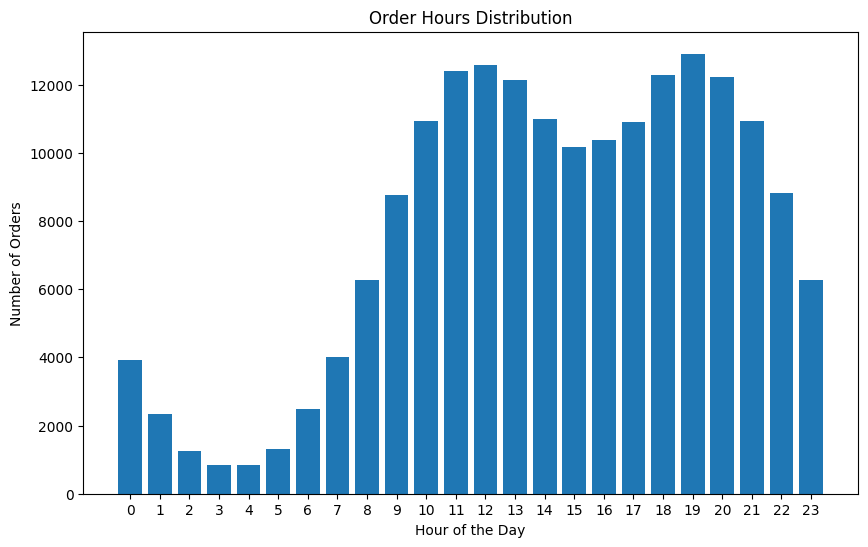

In [11]:
## Step2: show by using plot , get the most hour which clients make orders

# Count the number of orders for each hour
order_counts = df['Hour'].value_counts()

# Plot the order hours
plt.figure(figsize=(10, 6))
plt.bar(order_counts.index, order_counts.values)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.title('Order Hours Distribution')
plt.xticks(range(0, 24))
plt.show()

In [12]:
#### Question 4: What products are most often sold together?


# Create a new DataFrame with duplicate 'Order ID' values
duplicate_orders = df[df['Order ID'].duplicated(keep=False)]

# Group the duplicate orders by 'Order ID' and concatenate the products
duplicate_orders['Grouped Products'] = duplicate_orders.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))

# Drop duplicate rows to keep only unique order combinations
duplicate_orders = duplicate_orders[['Order ID', 'Grouped Products']].drop_duplicates()

# Count the occurrence of each product combination
product_combinations = duplicate_orders['Grouped Products'].value_counts().reset_index()

# Rename the columns for better interpretation
product_combinations.columns = ['Product Combination', 'Frequency']

# Print the top 5 most frequently sold product combinations
top_combinations = product_combinations.head(5)
print(top_combinations)


                     Product Combination  Frequency
0       iPhone, Lightning Charging Cable        882
1     Google Phone, USB-C Charging Cable        856
2               iPhone, Wired Headphones        361
3  Vareebadd Phone, USB-C Charging Cable        312
4         Google Phone, Wired Headphones        303


C:\Users\LEGION\AppData\Local\Temp\ipykernel_13584\126554910.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicate_orders['Grouped Products'] = duplicate_orders.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))


In [13]:
#### What product sold the most? Why do you think it sold the most?

# Calculate the total quantity sold for each product
product_sales = df.groupby('Product')['Quantity Ordered'].sum()

# Find the product that sold the most
best_product = product_sales.idxmax()
total_quantity_sold = product_sales.max()

# Print the result
print("The product that sold the most was", best_product, "with a total of", total_quantity_sold, "units sold.")


The product that sold the most was AAA Batteries (4-pack) with a total of 31017 units sold.
